# Titanic: Machine Learning from Disaster

**Source**: https://www.kaggle.com/c/titanic/data

**Objective**: to predict if a passenger survived the sinking of the Titanic or not. For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

**Metric**: Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

**Note**: Hint from competition description:
- Women, children, and the upper-class are more likely to survive
- Out 0f 2224 passengers 1502 passed away, it means 32.46% survived.

# Load libraries and dataset

In [1]:
#load libraries
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#load dataset
# load dataset
train = pd.read_csv(r'C:\Users\LW130003\Documents\GitHub\titanic\titanic_train.csv')
test = pd.read_csv(r'C:\Users\LW130003\Documents\GitHub\titanic\titanic_test.csv')

#Combine train and test into data:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)

data.shape

(1309, 13)

# 1. Variable Identification

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
source         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [3]:
# Numerical variable
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


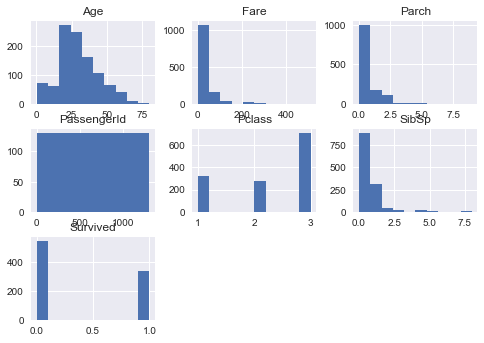

In [4]:
data.hist();

In [5]:
# Categorical variable
data.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket,source
count,295,1307,1309,1309,1309,1309
unique,186,3,1307,2,929,2
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343,train
freq,6,914,2,843,11,891


In [6]:
# List of feature in data set
categories = data.describe(include=['O']).columns.values.tolist()

# loop and print the categorical feature unique value
for feature in categories:
    print(str(feature)+ ':' + str(data[feature].unique()))

Cabin:[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148'
 'B45' 'B36' 'A21' 'D34' 'A9' 'C31' 'B6

Above, we can conclude:
1. There are 7 numerical variables
2. 'Age' feature is incomplete as it has less count compared to the rest. (From info() we find out the total count is 891 entry).
3. Skewed:
    - Right-skewed: 'Survived', 'Age', 'SibSp', 'Parch', 'Fare'
    - Left-skewed: 'Pclass'
    - Normal: 'PassengerId'
4. Continuous or Discrete:
    - Continuous: Age, Fare
    - Discrete: SibSp, Parch
5. There are 5 categorical variable
6. 'Cabin' has over 50% missing value -> can be dropped
7. 'Embarked' has little missing value and nan -> imputed or dropped. Imputed is better as this data set has small entry and dropped reduce the accuracy of machine learning.
8. 'Ticket' may also be dropped unless there is more information
9. 'Name'need feature engineering to be processed

# 2. Univariate Analysis
In this section, we will do:
1. Histogram
2. Boxplot

**Note**: we will focus on 'Survived' as this is our objective.

In [7]:
# summary statistic
train['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

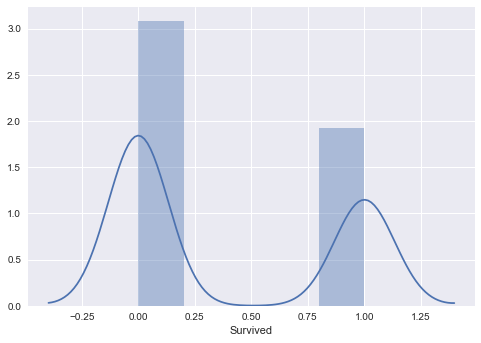

In [8]:
# histogram
sns.distplot(train['Survived']);

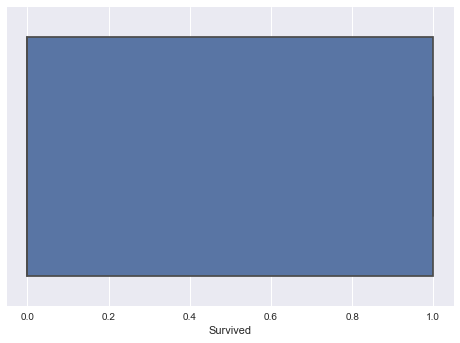

In [9]:
# boxplot
sns.boxplot(train['Survived']);

'Survived' is Discrete Histogram is not needed. It is also binary thus, boxplot is also not needed. Since we did not get anything from analyzing 'Survived' alone,  we will analyze 'Survived' by comparing it with another feature. But, there are few number of feature (only 11 (excluding PassengerId)). Therefore, we will:
- Convert the categorical feature to numerical
- Feature engineering 'Name' 
- Binning 'Age'
Before, doing bivariate analyzis

# 2. Categorical

There are 5 categorical feature:
- 2 of them 'Cabin' and 'Ticket' will be dropped. 'Cabin' because there are too many missing value (>50%), 'Ticket' because there are too many unique value and we don't have enough information what does the ticket number signify.
- In 'Embarked', there is 'nan' value and we will impute it with 'Embarked' mode.
- Feature engineering to 'Name', 'SibSp' and 'Parch'
- Binning 'Age' and 'FareBand'
- One hot encoding 'Embarked', 'Sex', 'AgeBand' and 'FareBand'

In [10]:
#dropping features
data.drop(['PassengerId', 'Cabin', 'Ticket'],axis=1,inplace=True)

#impute 'Embarked, 'Fare and 'age'
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(),inplace=True) #fill missing value

#creating backup
data2 = data.copy()

In [11]:
#feature engineering 'Name'
#first crosstab
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)    
pd.crosstab(data['Title'], data2['Sex']) #crosstab with gender, use data2 as 'Sex' was gone due to get_dummies

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [12]:
#replace uncommon title with 'Rare' and replace similar title
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
                                       'Dr', 'Rev', 'Sir', 'Jonkheer', 'Dona', 
                                       'Major'], 'Rare')
data['Title'] = data['Title'].replace(['Mlle', 'Ms'],'Miss')
data['Title'] = data['Title'].replace('Mme','Mrs')

data[['Title','Survived']].groupby(['Title'], as_index=False).mean()
data = data.drop('Name', axis=1) #'Name' is replaced with 'Title'

In [13]:
#feature engineer 'FamilySize' that will replace 'SibSp' and 'Parch'
data['FamilySize'] = data['SibSp'] + data['Parch'] +1
data[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [14]:
#feature engineer 'IsAlone' that will replace 'SibSp' and 'Parch'
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [15]:
data = data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
data.head()

,Age,Embarked,Fare,Pclass,Sex,Survived,source,Title,IsAlone
0,22.0,S,7.2500,3,male,0.0,train,Mr,0
1,38.0,C,71.2833,1,female,1.0,train,Mrs,0
2,26.0,S,7.9250,3,female,1.0,train,Miss,1
3,35.0,S,53.1000,1,female,1.0,train,Mrs,0
4,35.0,S,8.0500,3,male,0.0,train,Mr,1


In [16]:
#binning 'Age'
data['AgeBand'] = pd.cut(data['Age'].astype(int), 5) #change data type from float to int
data[['AgeBand', 'Survived']].groupby(['AgeBand'], 
                                      as_index=False).mean().sort_values(by='AgeBand', ascending=True)
data.drop('Age',axis=1,inplace=True) #drop 'Age' to avoid confusion

#binning 'Fare'
data['FareBand'] = pd.cut(data['Fare'].astype(int), 5) #change data type from float to int
data[['FareBand', 'Survived']].groupby(['FareBand'], 
                                      as_index=False).mean().sort_values(by='FareBand', ascending=True)
data.drop('Fare',axis=1,inplace=True) #drop 'Fare' to avoid confusion

In [17]:
#one hot encoding, we use get_dummies method
cols = ['Embarked', 'Sex', 'AgeBand', 'FareBand', 'Title']
data = pd.get_dummies(data, columns=cols)

# 3. Bivariate Analysis

In this section, we will do:
- Scatter plot
- Heatmap
- Analyze by pivoting feature
- Bar plot
- Point plot
- Histogram

C:\Users\LW130003\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\LW130003\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


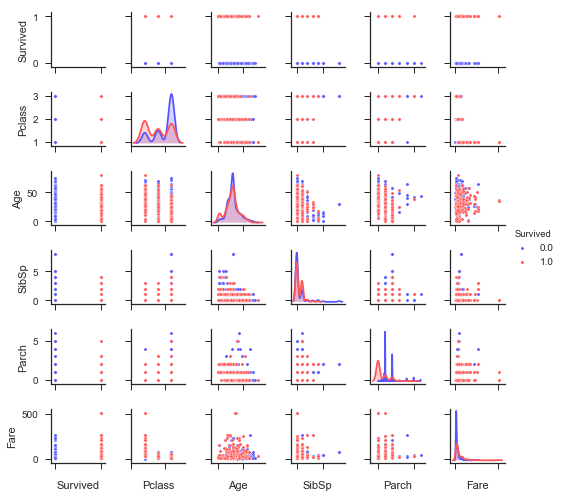

In [18]:
sns.set(style="ticks", color_codes=True)
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex'] #from hint
g = sns.pairplot(data2[cols],hue='Survived',palette='seismic', size=1.2, 
                 diag_kind ='kde', diag_kws = dict(shade=True), plot_kws = dict(s=10)) #we use data2
g.set(xticklabels=[])

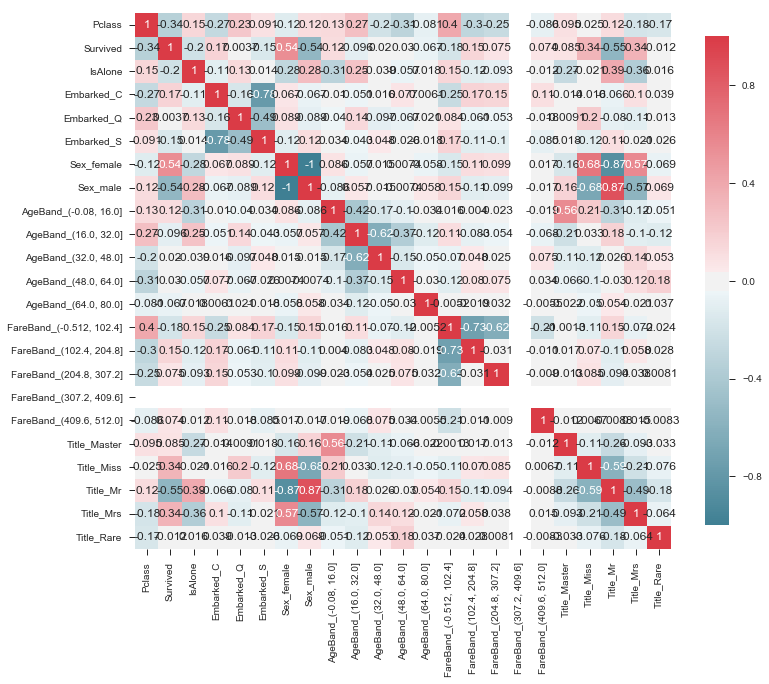

In [19]:
# correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, cmap=cmap, square=True, cbar_kws={'shrink': .9}, ax=ax,
            annot=True, annot_kws = {'fontsize' : 12});

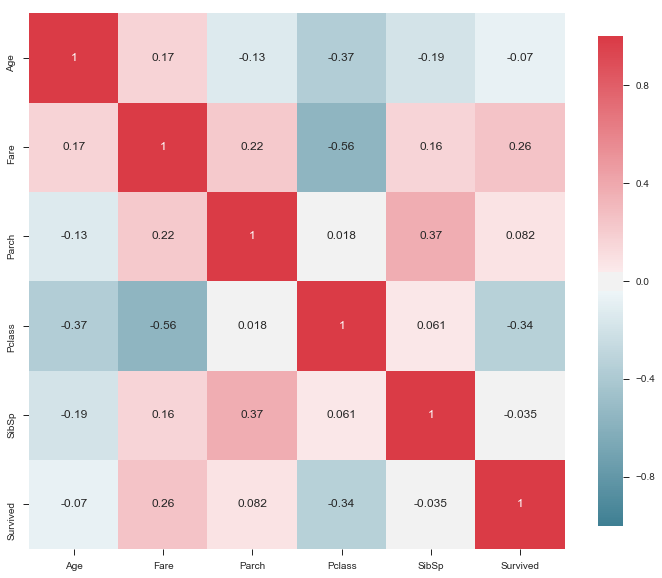

In [20]:
# correlation matrix2
corrmat = data2.corr()
f, ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, cmap=cmap, square=True, cbar_kws={'shrink': .9}, ax=ax,
            annot=True, annot_kws = {'fontsize' : 12});

In [21]:
#pivoting
#Pclass
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [22]:
#Sex
data2[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [23]:
#SibSp
data2[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [24]:
#Parch
data2[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000
7,9,NaN


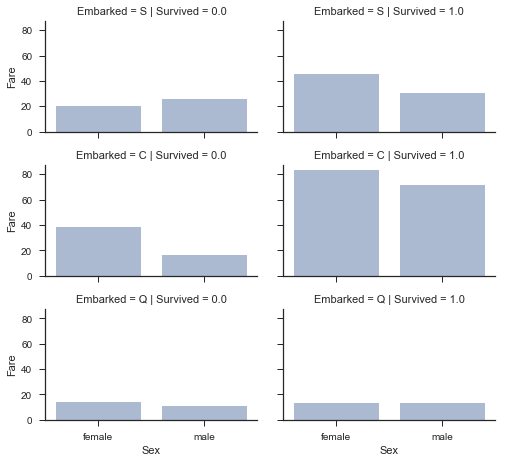

In [25]:
#bar plot
grid = sns.FacetGrid(data2, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None);
grid.add_legend();

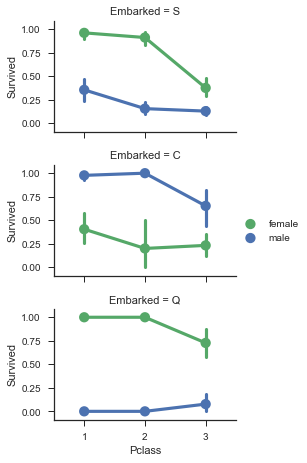

In [26]:
#point plot
grid = sns.FacetGrid(data2, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend();

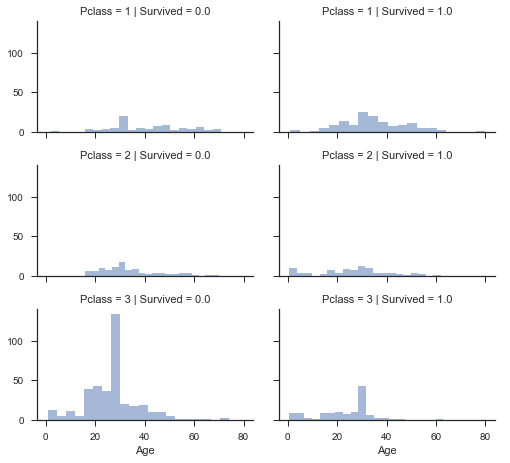

In [27]:
#histogram
grid = sns.FacetGrid(data2, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# 5. Separate train and test

In [28]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

# drop source column for train and source and SalePrice for test
train.drop('source',axis=1,inplace=True)
test.drop(['source','Survived'],axis=1,inplace=True)

# Saving
train.to_csv(r'C:\Users\LW130003\Documents\GitHub\titanic\train_modified.csv',index=False)
test.to_csv(r'C:\Users\LW130003\Documents\GitHub\titanic\test_modified.csv',index=False)

C:\Users\LW130003\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\LW130003\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
